In [1]:
# 1.1 Loading and Visualizing Data Please Note this data is clean for analysis.
import pandas as pd
mark_data = pd.read_csv(r"C:\Users\Apelu\OneDrive\Desktop\2225757_Code Snips\Modelling\Survival_Classifier\original_datasetCatNum.csv", low_memory=False)
mark_data


type_of_breast_surgery    cancer_type  \
0                MASTECTOMY  Breast Cancer   
1         BREAST CONSERVING  Breast Cancer   
2                MASTECTOMY  Breast Cancer   
3                MASTECTOMY  Breast Cancer   
4                MASTECTOMY  Breast Cancer   
...                     ...            ...   
1899      BREAST CONSERVING  Breast Cancer   
1900             MASTECTOMY  Breast Cancer   
1901             MASTECTOMY  Breast Cancer   
1902             MASTECTOMY  Breast Cancer   
1903      BREAST CONSERVING  Breast Cancer   

                           cancer_type_detailed cellularity  \
0              Breast Invasive Ductal Carcinoma         NaN   
1              Breast Invasive Ductal Carcinoma        High   
2              Breast Invasive Ductal Carcinoma        High   
3     Breast Mixed Ductal and Lobular Carcinoma    Moderate   
4     Breast Mixed Ductal and Lobular Carcinoma        High   
...                                         ...         ...   
1899          Breast Invasive Lobular Carcinoma        High   
1900           Breast Invasive Ductal Carcinoma        High   
1901           Breast Invasive Ductal Carcinoma        High   
1902           Breast Invasive Ductal Carcinoma    Moderate   
1903           Breast Invasive Ductal Carcinoma        High   

     pam50_._claudin.low_subtype er_status_measured_by_ihc er_status  \
0                    claudin-low                   Positve  Positive   
1                           LumA                   Positve  Positive   
2                           LumB                   Positve  Positive   
3                           LumB                   Positve  Positive   
4                           LumB                   Positve  Positive   
...                          ...                       ...       ...   
1899                        LumA                   Positve  Positive   
1900                        LumB                   Positve  Positive   
1901                        LumB                   Positve  Positive   
1902                        LumB                   Positve  Positive   
1903                        LumB                   Positve  Positive   

     her2_status_measured_by_snp6 her2_status tumor_other_histologic_subtype  \
0                         NEUTRAL    Negative                     Ductal/NST   
1                         NEUTRAL    Negative                     Ductal/NST   
2                         NEUTRAL    Negative                     Ductal/NST   
3                         NEUTRAL    Negative                          Mixed   
4                         NEUTRAL    Negative                          Mixed   
...                           ...         ...                            ...   
1899                      NEUTRAL    Negative                        Lobular   
1900                         GAIN    Positive                     Ductal/NST   
1901                      NEUTRAL    Negative                     Ductal/NST   
1902                      NEUTRAL    Negative                     Ductal/NST   
1903                      NEUTRAL    Negative                     Ductal/NST   

      ...  srd5a1  srd5a2  srd5a3     st7    star    tnk2   tulp4 ugt2b15  \
0     ... -1.1877 -0.0194 -1.6345 -0.2142 -0.5698 -1.1741 -1.4779 -0.5954   
1     ... -0.4412  0.4534  0.4068  0.7634  0.0231  0.9121 -0.9538 -0.2264   
2     ... -0.5381  0.0668  0.8344  1.7227  0.4024 -3.7172 -1.5538  1.3701   
3     ... -0.5630 -0.7078  0.8228  0.6819 -0.1948 -2.3286 -0.9924 -0.3154   
4     ... -0.5845 -0.3544 -1.0150  2.2961  0.1817 -0.1572  0.0427  5.0048   
...   ...     ...     ...     ...     ...     ...     ...     ...     ...   
1899  ...  0.7859  1.5304  1.1196  0.8116  0.0958 -1.2644 -0.3566 -0.2615   
1900  ... -0.5294 -0.6610 -0.1610  0.2251  0.5127 -0.3412 -1.0703 -0.6950   
1901  ... -0.1457 -0.5194  2.3968  0.5917 -0.8643 -1.3541 -1.8076 -0.1840   
1902  ... -0.6380 -1.5275  1.1070  0.2194  1.4317 -0.6985 -0.6046 -0.4915   
1903  ...  0.2067 -0.9

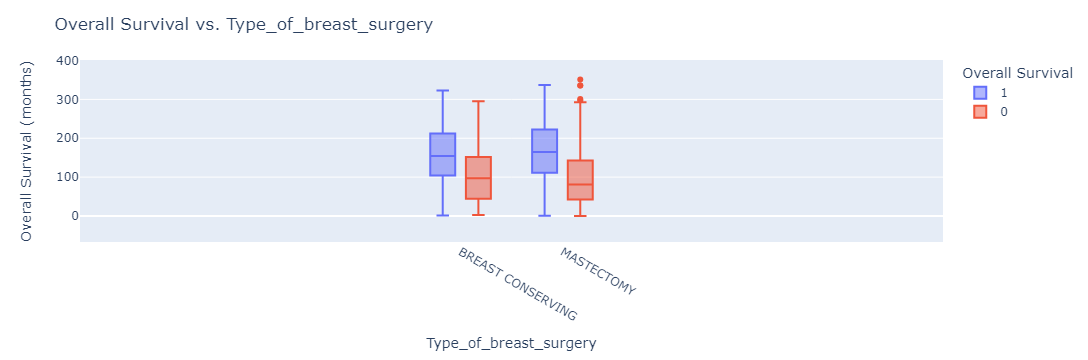

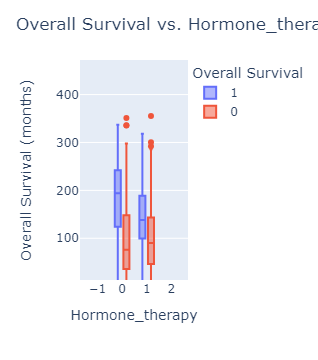

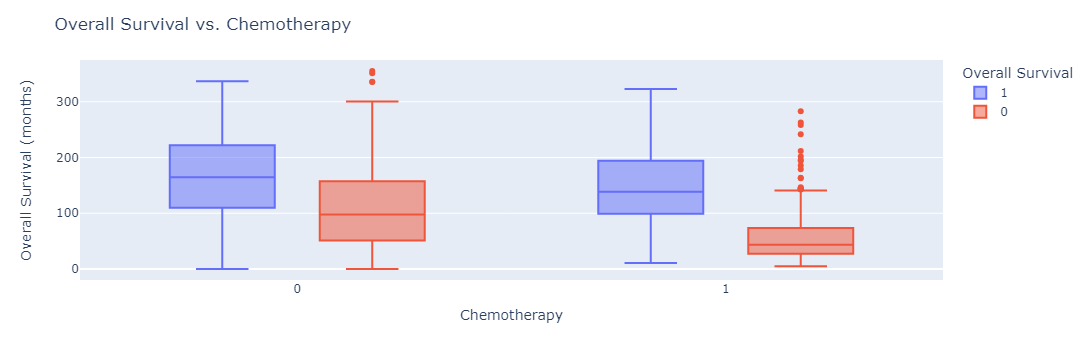

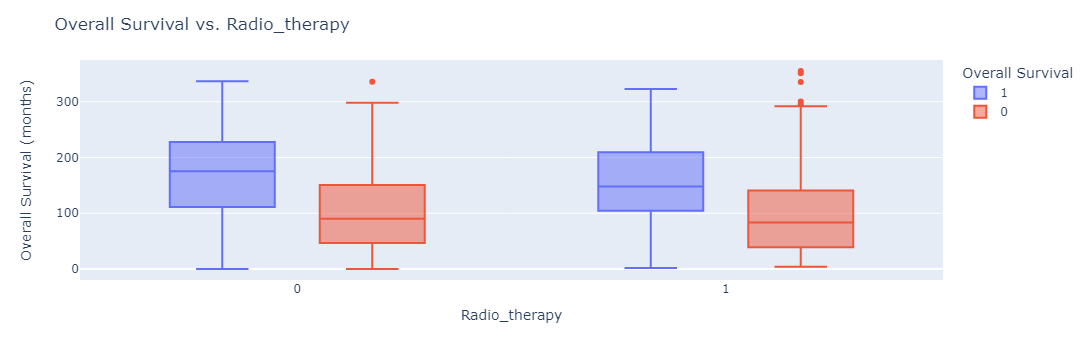

In [3]:
import plotly.express as px
import pandas as pd

# Assuming treatment_data is your loaded DataFrame
# You might have a different data structure, so adjust accordingly

# List of columns to plot
columns_to_plot = ["type_of_breast_surgery", "hormone_therapy", "chemotherapy", "radio_therapy"]

# Create a new DataFrame with the specified columns
subset_data = mark_data[columns_to_plot + ["overall_survival_months", "overall_survival"]]

# Create Plotly dashboards for box plots
for column in columns_to_plot:
    fig = px.box(subset_data, x=column, y='overall_survival_months', color='overall_survival',
                 labels={'overall_survival_months': 'Overall Survival (months)'})
    fig.update_layout(
        title=f"Overall Survival vs. {column.capitalize()}",
        xaxis_title=column.capitalize(),
        yaxis_title="Overall Survival (months)",
        legend_title="Overall Survival",
        xaxis={'categoryorder': 'total ascending'}  # Optional: to order categories
    )
    fig.show()

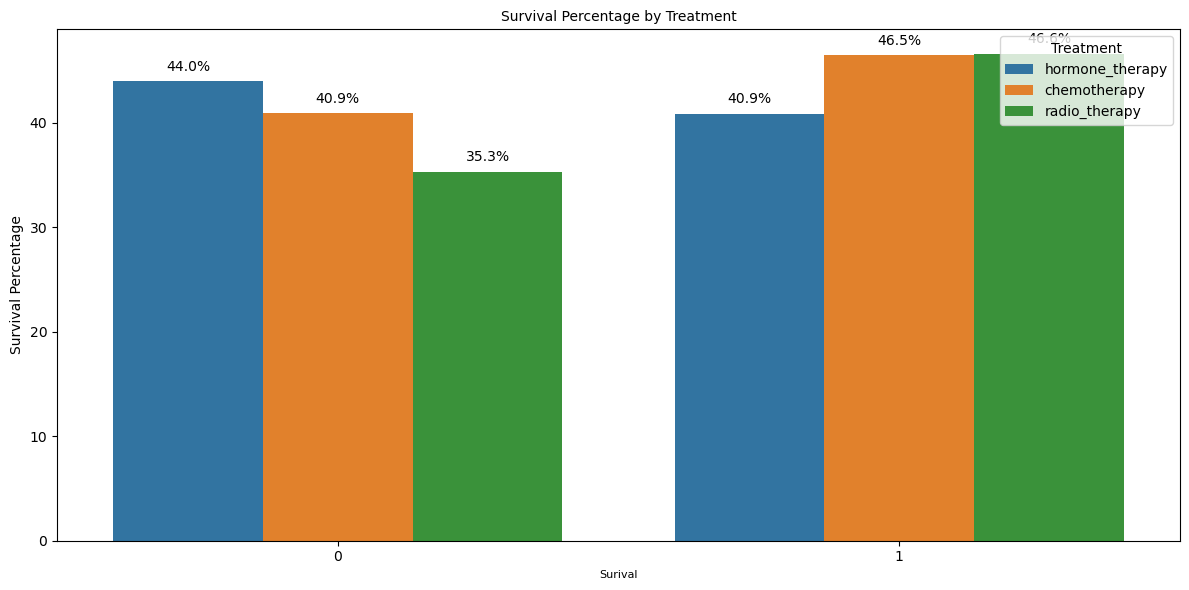

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming treatment_data is your loaded DataFrame
# You might have a different data structure, so adjust accordingly

# List of columns to plot
columns_to_plot = ["hormone_therapy", "chemotherapy", "radio_therapy"]

# Create a new DataFrame with the specified columns and overall_survival
subset_data = mark_data[columns_to_plot + ["overall_survival"]]

# Calculate survival percentage for each treatment group
survival_percentages = {}
for column in columns_to_plot:
    group_survival = subset_data.groupby(column)["overall_survival"].mean() * 100
    survival_percentages[column] = group_survival

# Create bar plots of survival percentages
survival_percentages_df = pd.DataFrame(survival_percentages).reset_index()
melted_df = pd.melt(survival_percentages_df, id_vars="index", value_vars=columns_to_plot)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=melted_df, x="index", y="value", hue="variable")
ax.set_xlabel("Surival", fontsize=8)
ax.set_ylabel("Survival Percentage", fontsize=10)
ax.set_title("Survival Percentage by Treatment", fontsize=10)
plt.xticks(rotation=0)
plt.legend(title="Treatment")

# Display survival percentage values on the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f"{height:.1f}%", ha="center", fontsize=10)

plt.tight_layout()

# Save the plot (optional)
plt.savefig("survival_percentages.png")

# Display the plot
plt.show()


In [4]:
#Marking Important correlation
import pandas as pd

#  mark_data is the loaded DataFrame
# Calculate correlation coefficients with overall_survival
correlations = mark_data.corr()["overall_survival"]

# Remove the "overall_survival" column itself from the correlations
correlations = correlations.drop("overall_survival")

# Define a threshold for important correlations
threshold = 0.09

# Filter correlations based on the threshold
important_correlations = correlations[abs(correlations) >= threshold]

# Configure Pandas to display all columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Display the important correlation coefficients
print("Important Correlation Coefficients:")
print(important_correlations)


Important Correlation Coefficients:
age_at_diagnosis                -0.303666
cohort                          -0.149645
lymph_nodes_examined_positive   -0.164498
nottingham_prognostic_index     -0.138000
overall_survival_months          0.384467
radio_therapy                    0.112083
tumor_size                      -0.163535
tumor_stage                     -0.162766
nf1                             -0.095559
bard1                           -0.102871
pms2                             0.118343
rb1                              0.114625
ccnb1                           -0.111186
ccnd1                           -0.091855
ccnd2                            0.149470
myc                              0.153997
e2f7                            -0.098082
jak1                             0.194412
jak2                             0.143870
stat3                            0.090948
stat5a                           0.152494
adam10                           0.108112
cir1                             0.09471

<Figure size 2000x1800 with 0 Axes>

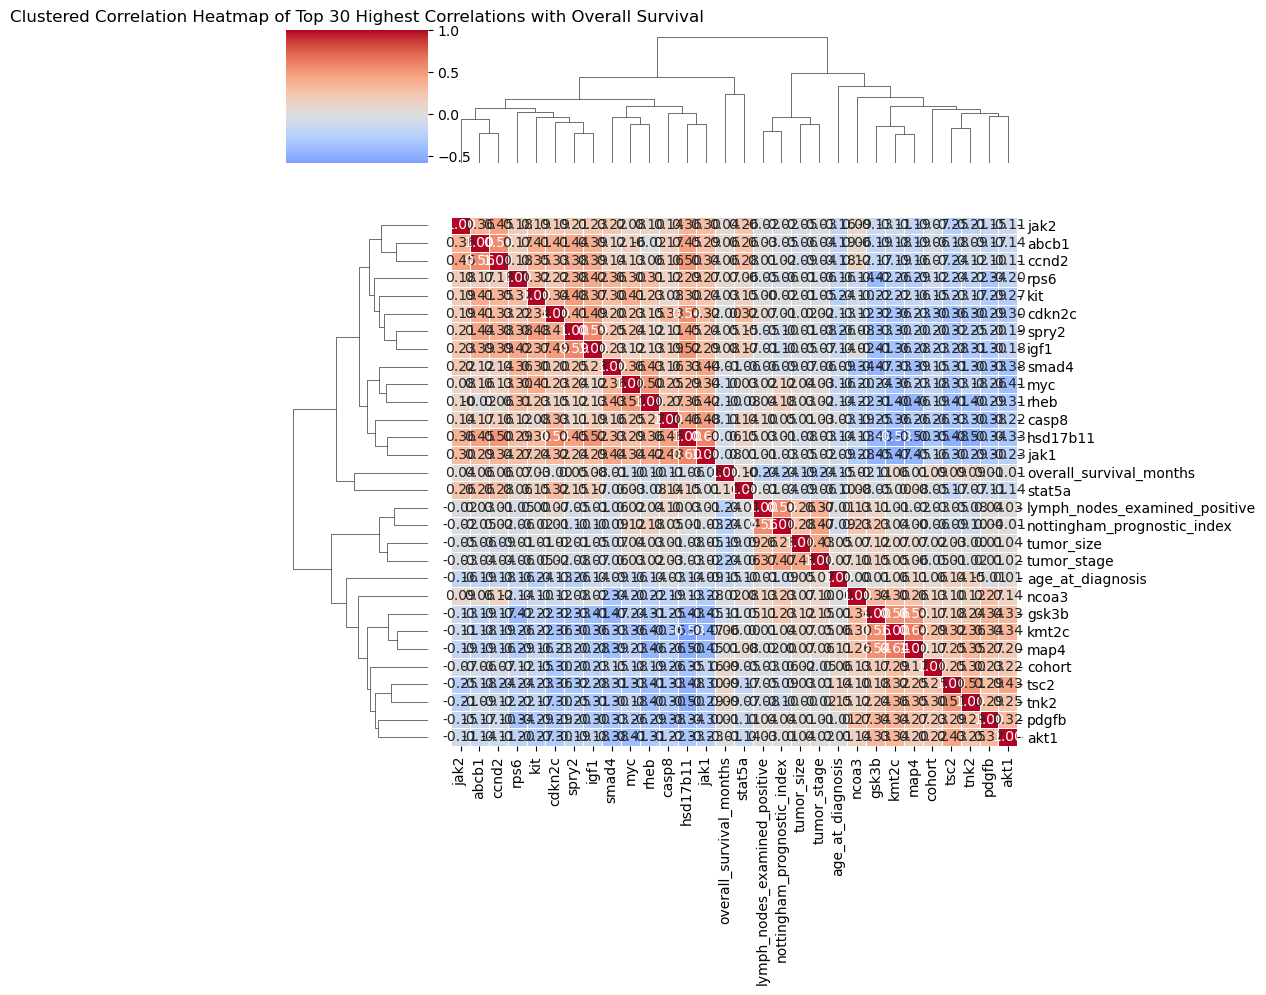

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mark_data is loaded to DataFrame


# Calculate correlation coefficients with overall_survival
correlations = mark_data.corr()["overall_survival"]

# Remove the "overall_survival" column itself from the correlations
correlations = correlations.drop("overall_survival")

# Get the top 30 highest absolute correlations
top_correlations = correlations.abs().nlargest(30)

# Get the columns corresponding to the top correlations
top_correlation_columns = top_correlations.index

# Create a DataFrame with the selected columns
selected_data = mark_data[top_correlation_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Create a clustered heatmap
plt.figure(figsize=(20, 18))
clustered_heatmap = sns.clustermap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Clustered Correlation Heatmap of Top 30 Highest Correlations with Overall Survival")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Save the plot (optional)
plt.savefig("clustered_correlation_heatmap.png")

# Display the plot
plt.show()


Important features from Gradient Boosting Classifier:
primary_tumor_laterality: 0.00466797268386057
age_at_diagnosis: 0.0036109261418649217
chemotherapy: 0.006456494713211246
cohort: 0.01909686541849466
lymph_nodes_examined_positive: 0.02817715904166089
nottingham_prognostic_index: 0.10599310917228916
radio_therapy: 0.3180616397418684
tumor_size: 0.06558029386494592
tumor_stage: 0.029958342283294193
cdh1: 0.002574865470338181
chek2: 0.00226736760669508
bard1: 0.010702256313103259
msh6: 0.00499717993144506
rbl1: 0.003318247627051035
ccne1: 0.00868314751062378
jak1: 0.02054280211218089
arrdc1: 0.0020608772803824534
ctbp1: 0.0022347833240445
dll4: 0.0027607870292516877
dtx1: 0.002001837255365451
hes5: 0.003125280833564626
maml1: 0.008321753735920635
nrarp: 0.003915353141597312
numb: 0.006187423820117219
bmp6: 0.002434192804411208
dab2: 0.003728531605255739
egfr: 0.003972120899625793
fgf1: 0.0028572862645372434
map2k5: 0.003221237435301786
mdc1: 0.005260043630418562
mmp23b: 0.0023395259195

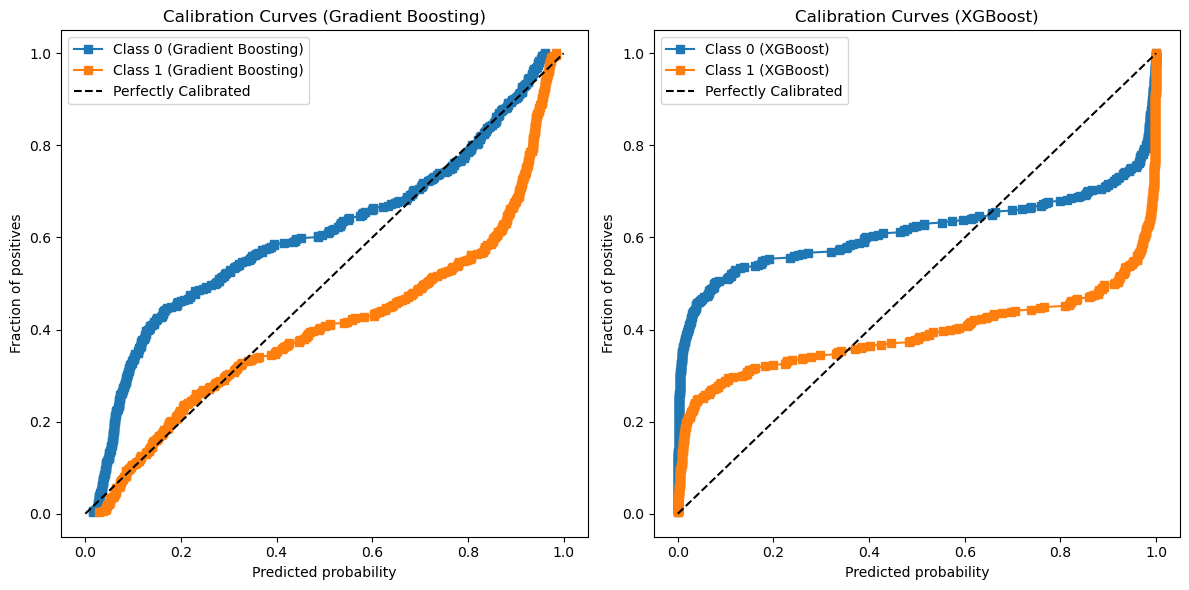

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
import numpy as np

# Load your mark_data or replace it with your actual dataset

# Identify categorical columns
categorical_columns = mark_data.select_dtypes(include=["object"]).columns

# Encode categorical features into numerical values
label_encoder = LabelEncoder()
for col in categorical_columns:
    mark_data[col] = label_encoder.fit_transform(mark_data[col])

# Define features (X) and target (y)
X = mark_data.drop("type_of_breast_surgery", axis=1)
y = mark_data["type_of_breast_surgery"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# Train an XGBoost Classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Calculate feature importances for both classifiers
gb_feature_importances = gb_classifier.feature_importances_
xgb_feature_importances = xgb_classifier.feature_importances_

# Get feature names
gb_feature_names = X.columns
xgb_feature_names = X.columns

# Create dictionaries to store feature importances
gb_feature_importance_dict = dict(zip(gb_feature_names, gb_feature_importances))
xgb_feature_importance_dict = dict(zip(xgb_feature_names, xgb_feature_importances))

# Print important features for each classifier
print("Important features from Gradient Boosting Classifier:")
important_gb_features = {feature: importance for feature, importance in gb_feature_importance_dict.items() if importance > 0.002}
for feature, importance in important_gb_features.items():
    print(f"{feature}: {importance}")

print("\nImportant features from XGBoost Classifier:")
important_xgb_features = {feature: importance for feature, importance in xgb_feature_importance_dict.items() if importance > 0.002}
for feature, importance in important_xgb_features.items():
    print(f"{feature}: {importance}")

# Evaluate models
gb_predictions = gb_classifier.predict(X_test)
xgb_predictions = xgb_classifier.predict(X_test)

print("\nGradient Boosting Classifier Report:")
print(classification_report(y_test, gb_predictions))

print("\nXGBoost Classifier Report:")
print(classification_report(y_test, xgb_predictions))

# Predict probability estimates for each class
gb_prob_estimates = gb_classifier.predict_proba(X_test)
xgb_prob_estimates = xgb_classifier.predict_proba(X_test)

# Plot Calibration Curves for each class
plt.figure(figsize=(12, 6))

for class_idx in range(len(gb_prob_estimates[0])):
    if class_idx != 2:  # Exclude Class 2
        prob_true_gb = gb_prob_estimates[:, class_idx]
        prob_true_xgb = xgb_prob_estimates[:, class_idx]
        prob_true_sorted_gb = np.sort(prob_true_gb)
        prob_true_sorted_xgb = np.sort(prob_true_xgb)
        fraction_of_positives_gb = np.arange(1, len(prob_true_sorted_gb) + 1) / len(prob_true_sorted_gb)
        fraction_of_positives_xgb = np.arange(1, len(prob_true_sorted_xgb) + 1) / len(prob_true_sorted_xgb)
        
        plt.subplot(1, 2, 1)
        plt.plot(prob_true_sorted_gb, fraction_of_positives_gb, "s-", label=f"Class {class_idx} (Gradient Boosting)")
        
        plt.subplot(1, 2, 2)
        plt.plot(prob_true_sorted_xgb, fraction_of_positives_xgb, "s-", label=f"Class {class_idx} (XGBoost)")

plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], "k--", label="Perfectly Calibrated")
plt.xlabel("Predicted probability")
plt.ylabel("Fraction of positives")
plt.title("Calibration Curves (Gradient Boosting)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot([0, 1], [0, 1], "k--", label="Perfectly Calibrated")
plt.xlabel("Predicted probability")
plt.ylabel("Fraction of positives")
plt.title("Calibration Curves (XGBoost)")
plt.legend()

plt.tight_layout()
plt.show()


Important features from Gradient Boosting Classifier:
er_status_measured_by_ihc: 0.2246206798301672
er_status: 0.008253742778760296
setdb1_mut: 0.0027792675638703937
age_at_diagnosis: 0.05208624893537709
cohort: 0.06270362569390285
lymph_nodes_examined_positive: 0.18247271394331854
mutation_count: 0.006632679832295238
nottingham_prognostic_index: 0.050226131928952665
overall_survival_months: 0.024870495100236704
radio_therapy: 0.004083197759761217
tumor_stage: 0.01224233127619052
brca1: 0.003739868616694764
ccnd1: 0.0021727881444419577
cdkn2b: 0.0021985333874229044
e2f8: 0.0024530557333414405
stat1: 0.0027847692577808586
dtx2: 0.004013043545867281
maml3: 0.0030838637378126864
notch3: 0.0026491757228179202
numbl: 0.002467568351102417
bmpr1b: 0.0022506915618593563
braf: 0.0021598232445201398
cxcl8: 0.00663023574994882
fgfr1: 0.004911646714046839
foxo3: 0.0026168061481351684
izumo1r: 0.0025213648584889365
map2k1: 0.006332562335916001
map3k1: 0.0031579236859180216
map3k5: 0.007881780429256

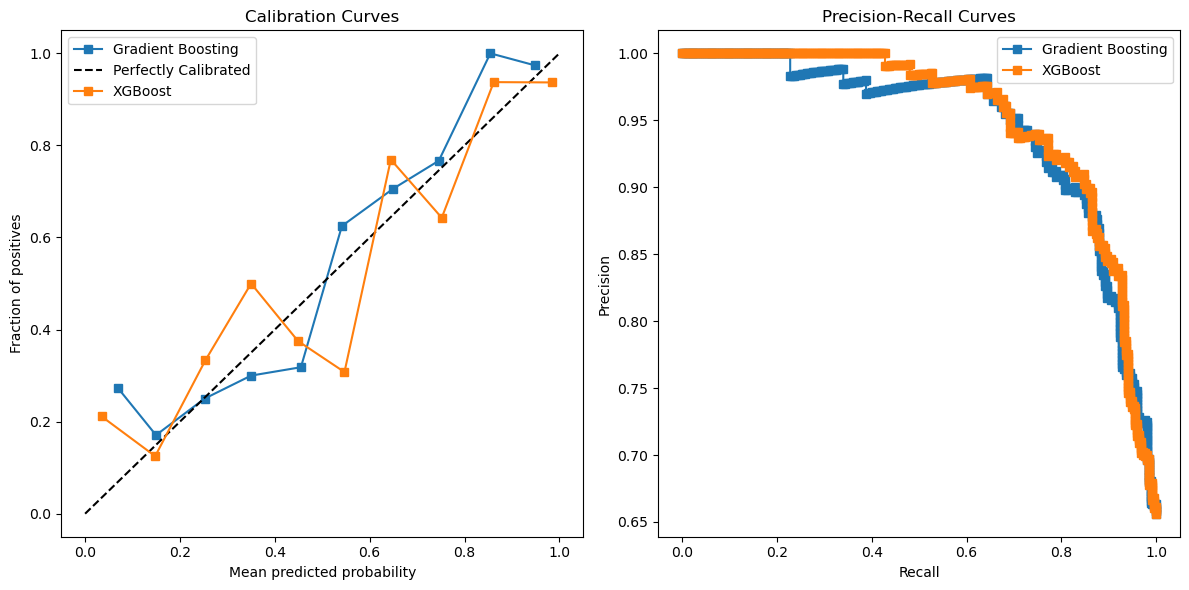

In [4]:
#Treament Classification (Hormone therapy) 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.metrics import precision_recall_curve

# Identify categorical columns
categorical_columns = mark_data.select_dtypes(include=["object"]).columns

# Encode categorical features into numerical values
label_encoder = LabelEncoder()
for col in categorical_columns:
    mark_data[col] = label_encoder.fit_transform(mark_data[col])

# Define features (X) and target (y)
X = mark_data.drop("hormone_therapy", axis=1)
y = mark_data["hormone_therapy"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# Train an XGBoost Classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Calculate feature importances for both classifiers
gb_feature_importances = gb_classifier.feature_importances_
xgb_feature_importances = xgb_classifier.feature_importances_

# Get feature names
gb_feature_names = X.columns
xgb_feature_names = X.columns

# Create dictionaries to store feature importances
gb_feature_importance_dict = dict(zip(gb_feature_names, gb_feature_importances))
xgb_feature_importance_dict = dict(zip(xgb_feature_names, xgb_feature_importances))

# Print important features for each classifier
print("Important features from Gradient Boosting Classifier:")
important_gb_features = {feature: importance for feature, importance in gb_feature_importance_dict.items() if importance > 0.002}
for feature, importance in important_gb_features.items():
    print(f"{feature}: {importance}")

print("\nImportant features from XGBoost Classifier:")
important_xgb_features = {feature: importance for feature, importance in xgb_feature_importance_dict.items() if importance > 0.002}
for feature, importance in important_xgb_features.items():
    print(f"{feature}: {importance}")

# Evaluate models
gb_predictions = gb_classifier.predict(X_test)
xgb_predictions = xgb_classifier.predict(X_test)

print("\nGradient Boosting Classifier Report:")
print(classification_report(y_test, gb_predictions))

print("\nXGBoost Classifier Report:")
print(classification_report(y_test, xgb_predictions))

# Predict probabilities for both classifiers
gb_prob_pos = gb_classifier.predict_proba(X_test)[:, 1]
xgb_prob_pos = xgb_classifier.predict_proba(X_test)[:, 1]

# Calibration curve for Gradient Boosting Classifier
fraction_of_positives_gb, mean_predicted_value_gb = calibration_curve(y_test, gb_prob_pos, n_bins=10)

# Calibration curve for XGBoost Classifier
fraction_of_positives_xgb, mean_predicted_value_xgb = calibration_curve(y_test, xgb_prob_pos, n_bins=10)

# Precision-Recall curve for Gradient Boosting Classifier
precision_gb, recall_gb, _ = precision_recall_curve(y_test, gb_prob_pos)

# Precision-Recall curve for XGBoost Classifier
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_prob_pos)

# Plot Calibration Curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mean_predicted_value_gb, fraction_of_positives_gb, "s-", label="Gradient Boosting")
plt.plot([0, 1], [0, 1], "k--", label="Perfectly Calibrated")  # Perfect line
plt.plot(mean_predicted_value_xgb, fraction_of_positives_xgb, "s-", label="XGBoost")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title("Calibration Curves")
plt.legend()

# Plot Precision-Recall Curves
plt.subplot(1, 2, 2)
plt.plot(recall_gb, precision_gb, "s-", label="Gradient Boosting")
plt.plot(recall_xgb, precision_xgb, "s-", label="XGBoost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()

plt.tight_layout()
plt.show()


Important features from Gradient Boosting Classifier:
type_of_breast_surgery: 0.3465651914909264
dnah2_mut: 0.004534019860537385
ep300_mut: 0.0021234304788314727
chemotherapy: 0.04446030084460745
cohort: 0.05349026935738692
hormone_therapy: 0.010452262493302267
lymph_nodes_examined_positive: 0.02480473364349473
nottingham_prognostic_index: 0.09894822459527172
tumor_stage: 0.05595047194239383
brca2: 0.0027558943421570692
cdh1: 0.0026181459378997137
mlh1: 0.004771132037375789
rad51d: 0.002085152384625115
ccne1: 0.0032215486894223017
ccnd2: 0.002386655731296396
cdkn2b: 0.0027939011029949248
cdkn1a: 0.0025844881752175694
jak1: 0.016046105088438442
jak2: 0.00354303757300358
cir1: 0.0023627866452790138
dll1: 0.002439656557635847
fbxw7: 0.0029251694552254875
hes5: 0.0021608380019301093
maml3: 0.0022930835381317514
ncor2: 0.003671005165721317
akt2: 0.004304933874307642
aurka: 0.00235356817852098
bad: 0.0036896606242444226
diras3: 0.002014023290589157
itgav: 0.003371097611705791
kdr: 0.00334279

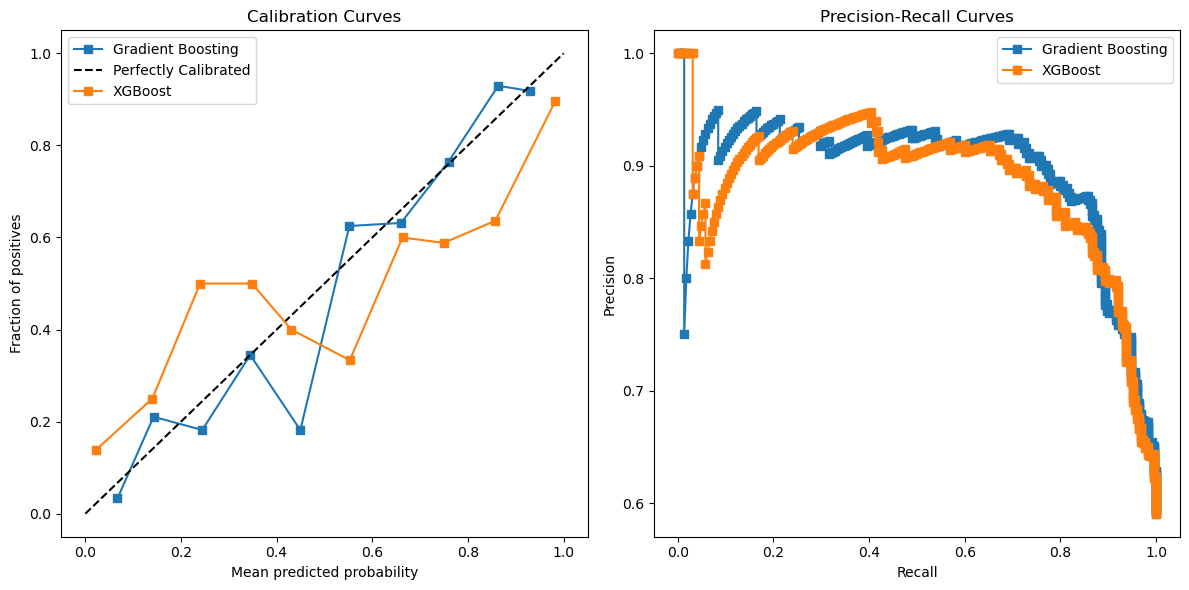

In [13]:
#Treament Classification (Radio therapy) 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.metrics import precision_recall_curve

# Identify categorical columns
categorical_columns = mark_data.select_dtypes(include=["object"]).columns

# Encode categorical features into numerical values
label_encoder = LabelEncoder()
for col in categorical_columns:
    mark_data[col] = label_encoder.fit_transform(mark_data[col])

# Define features (X) and target (y)
X = mark_data.drop("radio_therapy", axis=1)
y = mark_data["radio_therapy"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# Train an XGBoost Classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Calculate feature importances for both classifiers
gb_feature_importances = gb_classifier.feature_importances_
xgb_feature_importances = xgb_classifier.feature_importances_

# Get feature names
gb_feature_names = X.columns
xgb_feature_names = X.columns

# Create dictionaries to store feature importances
gb_feature_importance_dict = dict(zip(gb_feature_names, gb_feature_importances))
xgb_feature_importance_dict = dict(zip(xgb_feature_names, xgb_feature_importances))

# Print important features for each classifier
print("Important features from Gradient Boosting Classifier:")
important_gb_features = {feature: importance for feature, importance in gb_feature_importance_dict.items() if importance > 0.002}
for feature, importance in important_gb_features.items():
    print(f"{feature}: {importance}")

print("\nImportant features from XGBoost Classifier:")
important_xgb_features = {feature: importance for feature, importance in xgb_feature_importance_dict.items() if importance > 0.002}
for feature, importance in important_xgb_features.items():
    print(f"{feature}: {importance}")

# Evaluate models
gb_predictions = gb_classifier.predict(X_test)
xgb_predictions = xgb_classifier.predict(X_test)

print("\nGradient Boosting Classifier Report:")
print(classification_report(y_test, gb_predictions))

print("\nXGBoost Classifier Report:")
print(classification_report(y_test, xgb_predictions))

# Predict probabilities for both classifiers
gb_prob_pos = gb_classifier.predict_proba(X_test)[:, 1]
xgb_prob_pos = xgb_classifier.predict_proba(X_test)[:, 1]

# Calibration curve for Gradient Boosting Classifier
fraction_of_positives_gb, mean_predicted_value_gb = calibration_curve(y_test, gb_prob_pos, n_bins=10)

# Calibration curve for XGBoost Classifier
fraction_of_positives_xgb, mean_predicted_value_xgb = calibration_curve(y_test, xgb_prob_pos, n_bins=10)

# Precision-Recall curve for Gradient Boosting Classifier
precision_gb, recall_gb, _ = precision_recall_curve(y_test, gb_prob_pos)

# Precision-Recall curve for XGBoost Classifier
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_prob_pos)

# Plot Calibration Curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mean_predicted_value_gb, fraction_of_positives_gb, "s-", label="Gradient Boosting")
plt.plot([0, 1], [0, 1], "k--", label="Perfectly Calibrated")  # Perfect line
plt.plot(mean_predicted_value_xgb, fraction_of_positives_xgb, "s-", label="XGBoost")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title("Calibration Curves")
plt.legend()

# Plot Precision-Recall Curves
plt.subplot(1, 2, 2)
plt.plot(recall_gb, precision_gb, "s-", label="Gradient Boosting")
plt.plot(recall_xgb, precision_xgb, "s-", label="XGBoost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()

plt.tight_layout()
plt.show()


Important features from Gradient Boosting Classifier:
er_status_measured_by_ihc: 0.2908126570073431
setd1a_mut: 0.0025103805023122387
asxl2_mut: 0.004607967845517362
age_at_diagnosis: 0.10722159555683201
cohort: 0.1235690377798165
lymph_nodes_examined_positive: 0.21205335253892627
nottingham_prognostic_index: 0.05330063700163789
radio_therapy: 0.009215652636024444
tumor_stage: 0.006278615347693468
e2f7: 0.002315778239526228
tp53bp1: 0.0022662543401928597
cir1: 0.002122063467850081
numb: 0.0028670221935391898
aurka: 0.0030072300655010313
bcl2: 0.0030911565147006496
casp10: 0.0022536889341792524
csf1: 0.0027794557270378454
cxcl8: 0.007142072591562761
egfr: 0.0032068032927547604
folr2: 0.00393114966103808
foxo1: 0.002505524263474889
igf1r: 0.003986190232174772
mapk14: 0.003253848706246846
mapk6: 0.0038564652363549338
smad3: 0.0023679368148116936
terc: 0.002149926285778518
ccnd3: 0.005584124555372139
npnt: 0.004470028030068047
nras: 0.0041366701591149775
sf3b1: 0.009678400849646277
syne1: 

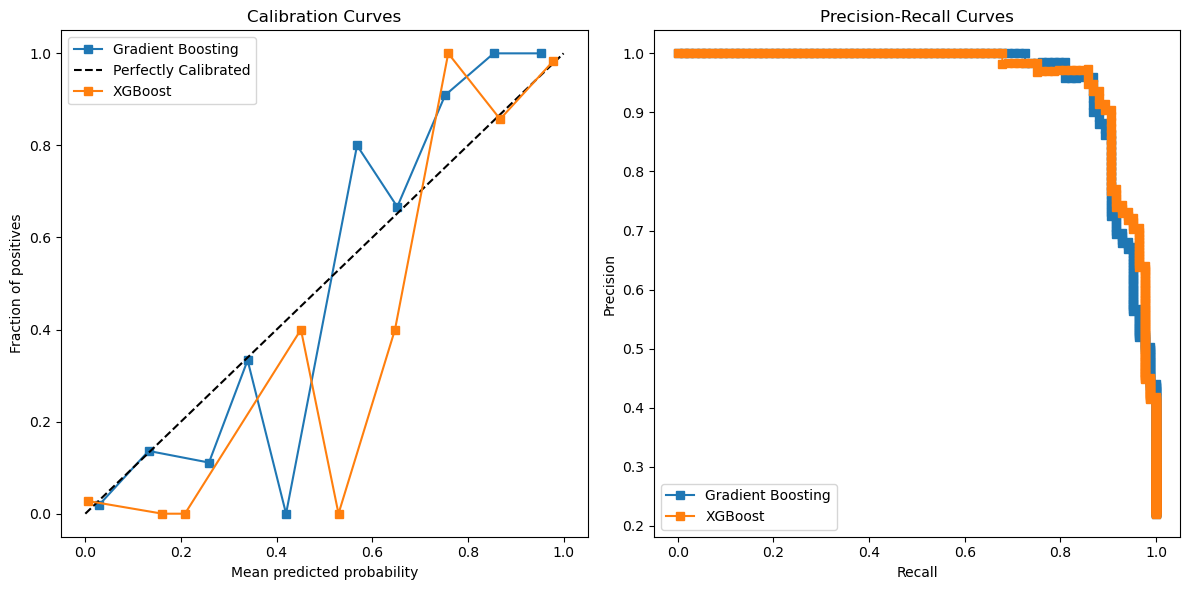

In [3]:

#Treament Classification (Chemotherapy) 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.metrics import precision_recall_curve

# Identify categorical columns
categorical_columns = mark_data.select_dtypes(include=["object"]).columns

# Encode categorical features into numerical values
label_encoder = LabelEncoder()
for col in categorical_columns:
    mark_data[col] = label_encoder.fit_transform(mark_data[col])

# Define features (X) and target (y)
X = mark_data.drop("chemotherapy", axis=1)
y = mark_data["chemotherapy"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# Train an XGBoost Classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Calculate feature importances for both classifiers
gb_feature_importances = gb_classifier.feature_importances_
xgb_feature_importances = xgb_classifier.feature_importances_

# Get feature names
gb_feature_names = X.columns
xgb_feature_names = X.columns

# Create dictionaries to store feature importances
gb_feature_importance_dict = dict(zip(gb_feature_names, gb_feature_importances))
xgb_feature_importance_dict = dict(zip(xgb_feature_names, xgb_feature_importances))

# Print important features for each classifier
print("Important features from Gradient Boosting Classifier:")
important_gb_features = {feature: importance for feature, importance in gb_feature_importance_dict.items() if importance > 0.002}
for feature, importance in important_gb_features.items():
    print(f"{feature}: {importance}")

print("\nImportant features from XGBoost Classifier:")
important_xgb_features = {feature: importance for feature, importance in xgb_feature_importance_dict.items() if importance > 0.002}
for feature, importance in important_xgb_features.items():
    print(f"{feature}: {importance}")

# Evaluate models
gb_predictions = gb_classifier.predict(X_test)
xgb_predictions = xgb_classifier.predict(X_test)

print("\nGradient Boosting Classifier Report:")
print(classification_report(y_test, gb_predictions))

print("\nXGBoost Classifier Report:")
print(classification_report(y_test, xgb_predictions))

# Predict probabilities for both classifiers
gb_prob_pos = gb_classifier.predict_proba(X_test)[:, 1]
xgb_prob_pos = xgb_classifier.predict_proba(X_test)[:, 1]

# Calibration curve for Gradient Boosting Classifier
fraction_of_positives_gb, mean_predicted_value_gb = calibration_curve(y_test, gb_prob_pos, n_bins=10)

# Calibration curve for XGBoost Classifier
fraction_of_positives_xgb, mean_predicted_value_xgb = calibration_curve(y_test, xgb_prob_pos, n_bins=10)

# Precision-Recall curve for Gradient Boosting Classifier
precision_gb, recall_gb, _ = precision_recall_curve(y_test, gb_prob_pos)

# Precision-Recall curve for XGBoost Classifier
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_prob_pos)

# Plot Calibration Curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mean_predicted_value_gb, fraction_of_positives_gb, "s-", label="Gradient Boosting")
plt.plot([0, 1], [0, 1], "k--", label="Perfectly Calibrated")  # Perfect line
plt.plot(mean_predicted_value_xgb, fraction_of_positives_xgb, "s-", label="XGBoost")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title("Calibration Curves")
plt.legend()

# Plot Precision-Recall Curves
plt.subplot(1, 2, 2)
plt.plot(recall_gb, precision_gb, "s-", label="Gradient Boosting")
plt.plot(recall_xgb, precision_xgb, "s-", label="XGBoost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()

plt.tight_layout()
plt.show()
